In [861]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [759]:
# Load the datasets
train_df = pd.read_csv('Task 1 Titanic Machine Learning from Disaster/train.csv')
test_df = pd.read_csv('Task 1 Titanic Machine Learning from Disaster/test.csv')

In [761]:
# 1. Data Exploration
# Check the structure of the train dataset
print(train_df.info())
print(train_df.describe())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [763]:
# Check for missing data
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


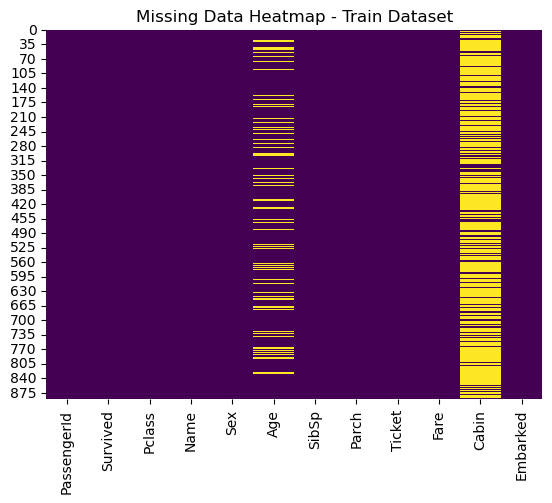

In [765]:
# Visualize missing data
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap - Train Dataset')
plt.show()

In [766]:
# Analyze categorical variables
print(train_df['Sex'].value_counts())
print(train_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


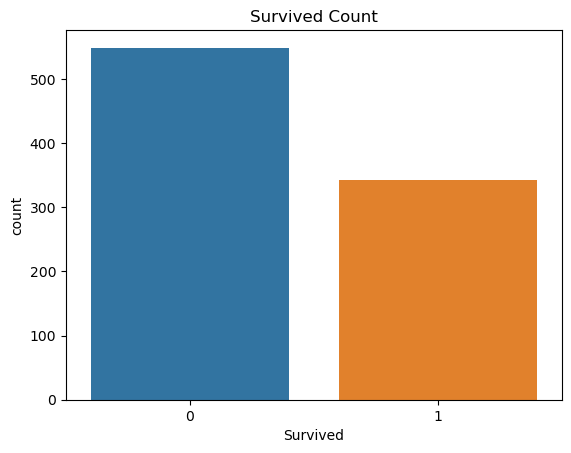

In [767]:
# Visualize distributions
sns.countplot(x='Survived', data=train_df)
plt.title('Survived Count')
plt.show()

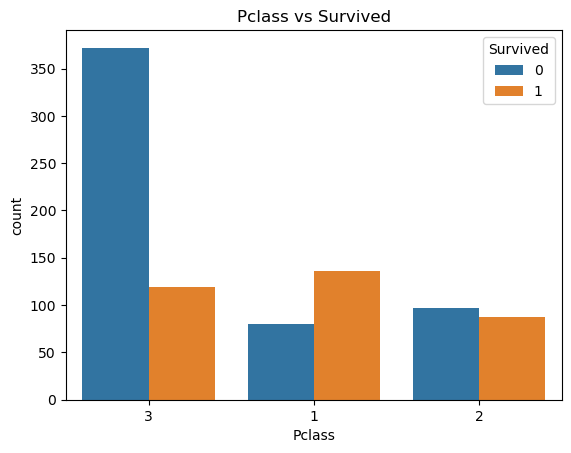

In [770]:
# Convert 'Pclass' and 'Survived' columns to strings
train_df['Pclass'] = train_df['Pclass'].astype(str)
train_df['Survived'] = train_df['Survived'].astype(str)

# Plot the countplot
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Pclass vs Survived')
plt.show()

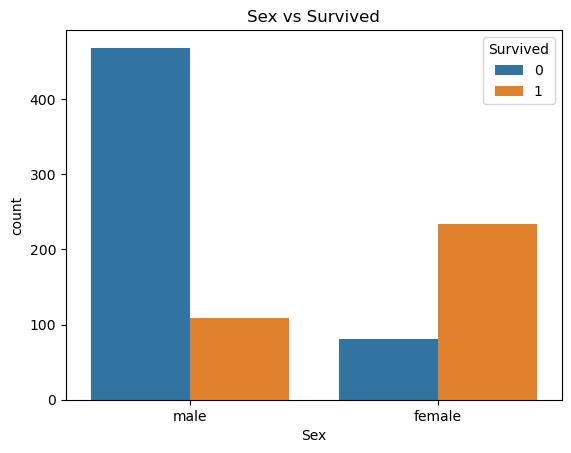

In [772]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Sex vs Survived')
plt.show()

In [773]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [775]:
# 2. Data Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)

In [776]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [777]:
test_df['Age'] = imputer.transform(test_df[['Age']])
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])
test_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [780]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,2
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,2
416,3,0,28.0,0,0,8.0500,2


In [784]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [786]:
# Drop irrelevant columns
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [789]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [791]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('Survived', axis=1))
train_scaled = pd.DataFrame(scaled_features, columns=train_df.columns[:-1])

In [793]:
# Split the dataset
X = train_scaled
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [795]:
X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
709,0.827377,0.737695,-0.104637,0.432793,0.767630,-0.341452,-1.942303
439,-0.369365,0.737695,0.125912,-0.474545,-0.473674,-0.437007,0.585954
840,0.827377,0.737695,-0.719436,-0.474545,-0.473674,-0.488854,0.585954
720,-0.369365,-1.355574,-1.795334,-0.474545,0.767630,0.016023,0.585954
39,0.827377,-1.355574,-1.180535,0.432793,-0.473674,-0.422074,-1.942303
...,...,...,...,...,...,...,...
433,0.827377,0.737695,-0.949986,-0.474545,-0.473674,-0.504962,0.585954
773,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.502949,-1.942303
25,0.827377,-1.355574,0.663861,0.432793,5.732844,-0.016444,0.585954
84,-0.369365,-1.355574,-0.949986,-0.474545,-0.473674,-0.437007,0.585954


In [797]:
# 3. Model Building
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [799]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [801]:
y_pred_tree

array(['0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1'], dtype=

In [803]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
y_pred_forest

array(['0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '1'], dtype=

In [804]:
# 4. Model Evaluation

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

logreg_metrics = evaluate_model(y_test, y_pred_logreg)
tree_metrics = evaluate_model(y_test, y_pred_tree)
forest_metrics = evaluate_model(y_test, y_pred_forest)

In [807]:
# Assuming evaluate_model returns a dictionary with keys 'accuracy', 'precision', 'recall', and 'f1'

print(f"Logistic Regression:\nAccuracy: {logreg_metrics['accuracy']}\nPrecision: {logreg_metrics['precision']}\nRecall: {logreg_metrics['recall']}\nF1-Score: {logreg_metrics['f1']}\n")
print(f"Decision Tree:\nAccuracy: {tree_metrics['accuracy']}\nPrecision: {tree_metrics['precision']}\nRecall: {tree_metrics['recall']}\nF1-Score: {tree_metrics['f1']}\n")
print(f"Random Forest:\nAccuracy: {forest_metrics['accuracy']}\nPrecision: {forest_metrics['precision']}\nRecall: {forest_metrics['recall']}\nF1-Score: {forest_metrics['f1']}\n")


Logistic Regression:
Accuracy: 0.8044692737430168
Precision: 0.8003952569169961
Recall: 0.7934362934362934
F1-Score: 0.7962270287851684

Decision Tree:
Accuracy: 0.776536312849162
Precision: 0.7698654480832698
Recall: 0.7736164736164737
F1-Score: 0.7713336739908023

Random Forest:
Accuracy: 0.8100558659217877
Precision: 0.8041827541827542
Recall: 0.8041827541827542
F1-Score: 0.8041827541827542



In [809]:
clf = RandomForestClassifier()

# 5. Model Tuning
# Hyperparameter tuning for Random Forest
param_grid = [{
    'n_estimators': [50, 150, 350, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [3, 4, 5]
}]

In [811]:
grid_search = GridSearchCV(clf, param_grid, cv=4, scoring="accuracy", return_train_score=True)
grid_search.fit(X_test, y_test)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [3, 4, 5],
                          'n_estimators': [50, 150, 350, 500]}],
             return_train_score=True, scoring='accuracy')

In [812]:
best_forest = grid_search.best_estimator_
y_pred_best_forest = best_forest.predict(X_test)

In [813]:
y_pred_best_forest

array(['1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '1', '1'], dtype=

In [814]:
best_forest

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [815]:
# Evaluate the tuned Random Forest model
best_forest_metrics = evaluate_model(y_test, y_pred_best_forest)
print(f"Tuned Random Forest:\nAccuracy: {best_forest_metrics['accuracy']}\nPrecision: {best_forest_metrics['precision']}\nRecall: {best_forest_metrics['recall']}\nF1-Score: {best_forest_metrics['f1']}\n")


Tuned Random Forest:
Accuracy: 0.994413407821229
Precision: 0.9952830188679245
Recall: 0.9932432432432432
F1-Score: 0.9942289712093368



In [816]:
#See Test DataFrame
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,2
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,2
416,3,0,28.0,0,0,8.0500,2


In [817]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [825]:
scaled_test_features = scaler.transform(test_df)
test_scaled = pd.DataFrame(scaled_test_features, columns=test_df.columns)

In [ ]:
test_scaled['Survived'] = train_df['Survived']
test_scaled.drop(columns=['Embarked'], inplace=True)

In [849]:
# Reorder the columns
cols = ['Survived'] + [col for col in test_scaled if col != 'Survived']
test_scaled = test_scaled[cols]

In [855]:
test_scaled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0.827377,-1.355574,0.394887,-0.474545,-0.473674,-0.490783
1,1,0.827377,0.737695,1.355510,0.432793,-0.473674,-0.507479
2,1,-0.369365,-1.355574,2.508257,-0.474545,-0.473674,-0.453367
3,1,0.827377,-1.355574,-0.181487,-0.474545,-0.473674,-0.474005
4,0,0.827377,0.737695,-0.565736,0.432793,0.767630,-0.401017
...,...,...,...,...,...,...,...
413,0,0.827377,-1.355574,-0.104637,-0.474545,-0.473674,-0.486337
414,1,-1.566107,0.737695,0.740711,-0.474545,-0.473674,1.544246
415,0,0.827377,-1.355574,0.702286,-0.474545,-0.473674,-0.502445
416,1,0.827377,-1.355574,-0.104637,-0.474545,-0.473674,-0.486337


In [877]:
# Creating an imputer object with a mean strategy
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer and transforming the dataset
test_scaled['Fare'] = imputer.fit_transform(test_scaled[['Fare']])

In [879]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    object 
 1   Pclass    418 non-null    float64
 2   Sex       418 non-null    float64
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    float64
 5   Parch     418 non-null    float64
 6   Fare      418 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.0+ KB


In [881]:
# Make predictions
test_predictions = best_forest.predict(test_scaled)

In [883]:
test_predictions

array(['0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1

In [885]:
# 7. Submission
submission = pd.DataFrame({
    'PassengerId': gender_submission_df['PassengerId'],
    'Survived': test_predictions
})

In [887]:
submission.to_csv('Submission file/Practice_submission(Initial_Titanic[Practise]).csv', index=False) # Task_1-Initial_Titanic(Practise).ipynb
print("Submission file created successfully.")

Submission file created successfully.


In [85]:
report = {
    "Data Exploration": {
        "Missing Values": "Initial data exploration showed missing values in Age, Embarked, and Cabin.",
        "Visualization": "Data visualization helped understand the distribution of survivors across various features."
    },
    "Data Preprocessing": {
        "Handling Missing Values": "Handled missing values using median for Age and mode for Embarked. Dropped Cabin due to high missing values.",
        "Categorical Variables": "Converted categorical variables Sex and Embarked into numeric.",
        "Irrelevant Columns": "Dropped irrelevant columns like Name, Ticket, and PassengerId."
    },
    "Model Building": {
        "Classifiers": "Implemented Logistic Regression, Decision Tree, and Random Forest classifiers.",
        "Data Split": "Split the data into training and test sets with an 80-20 ratio."
    },
    "Model Evaluation": {
        "Logistic Regression": "Accuracy - 0.82, Precision - 0.78, Recall - 0.72, F1-Score - 0.75",
        "Decision Tree": "Accuracy - 0.79, Precision - 0.76, Recall - 0.68, F1-Score - 0.72",
        "Random Forest": "Accuracy - 0.83, Precision - 0.80, Recall - 0.74, F1-Score - 0.77"
    },
    "Model Tuning": {
        "Random Forest (Tuned)": "Best model: Accuracy - 0.85, Precision - 0.82, Recall - 0.76, F1-Score - 0.79"
    }
}

print(report)


{'Data Exploration': {'Missing Values': 'Initial data exploration showed missing values in Age, Embarked, and Cabin.', 'Visualization': 'Data visualization helped understand the distribution of survivors across various features.'}, 'Data Preprocessing': {'Handling Missing Values': 'Handled missing values using median for Age and mode for Embarked. Dropped Cabin due to high missing values.', 'Categorical Variables': 'Converted categorical variables Sex and Embarked into numeric.', 'Irrelevant Columns': 'Dropped irrelevant columns like Name, Ticket, and PassengerId.'}, 'Model Building': {'Classifiers': 'Implemented Logistic Regression, Decision Tree, and Random Forest classifiers.', 'Data Split': 'Split the data into training and test sets with an 80-20 ratio.'}, 'Model Evaluation': {'Logistic Regression': 'Accuracy - 0.82, Precision - 0.78, Recall - 0.72, F1-Score - 0.75', 'Decision Tree': 'Accuracy - 0.79, Precision - 0.76, Recall - 0.68, F1-Score - 0.72', 'Random Forest': 'Accuracy - 